<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [787]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import svm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor
from sklearn.datasets import make_regression
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

In [788]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv("test.csv")

train_data.head()
test_data.head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,dereg_value,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price
0,1303772,Honda Vezel 1.5A X,honda,vezel,4614,2015.0,NaN,29-apr-2015,suv,parf car,...,9582.0,112000.0,19229.0,9229.0,NaN,NaN,uncategorized,"powerful 1.5l i-vtec engine producing 128bhp, ...","pioneer touch screen with reverse camera, 16"" ...",NaN
1,1323166,Mazda 3 1.6A SP (COE till 10/2027),mazda,3,extremely well maintained and in pristine cond...,2007.0,NaN,26-oct-2007,mid-sized sedan,"coe car, premium ad car, low mileage car",...,13644.0,120000.0,14347.0,15782.0,NaN,NaN,uncategorized,fuel efficient 1.6l 4-cylinder inline 16-valve...,"multi-function steering wheel, keyless entry, ...",NaN
2,1308405,MINI Cooper S Countryman 2.0A,mini,cooper,1 owner! beautiful island blue color! eurokars...,2019.0,NaN,27-mar-2020,sports car,parf car,...,54818.0,43000.0,39863.0,47809.0,NaN,NaN,uncategorized,"output of 141kw, 189bhp at 5000rpm to 6000rpm,...","18"" sports rims, sports leather seats, navigat...",NaN
3,1216706,Toyota Vios 1.5A G,toyota,vios,fully agent maintain! genuine low mileage at 5...,2019.0,NaN,28-jun-2019,mid-sized sedan,"parf car, premium ad car",...,26363.0,53300.0,15573.0,15573.0,NaN,NaN,uncategorized,"1.5l 4 cylinder 16 valves dohc vvt-i engine, 7...","push start button, toyota factory player, reve...",NaN
4,1298206,Mazda 3 HB 1.5A,mazda,3,workshop check/sta evaluation available. accid...,2015.0,NaN,19-nov-2015,hatchback,"parf car, premium ad car",...,15197.0,149000.0,18097.0,13097.0,NaN,NaN,uncategorized,1.5l 4 cylinder inline dohc 16 valves skyactiv...,factory fitted audio with audio & multi functi...,NaN


In [789]:
print('Training data number = {}'.format(train_data.shape[0]))
print('Test data number = {}\n'.format(test_data.shape[0]))
train_data.columns 

Training data number = 25000
Test data number = 10000



Index(['listing_id', 'title', 'make', 'model', 'description', 'manufactured',
       'original_reg_date', 'reg_date', 'type_of_vehicle', 'category',
       'transmission', 'curb_weight', 'power', 'fuel_type', 'engine_cap',
       'no_of_owners', 'depreciation', 'coe', 'road_tax', 'dereg_value',
       'mileage', 'omv', 'arf', 'opc_scheme', 'lifespan', 'eco_category',
       'features', 'accessories', 'indicative_price', 'price'],
      dtype='object')

In [790]:
train_data.select_dtypes(exclude=['object']).isna().sum()
train_data.select_dtypes(include=['object']).isna().sum()

test_data.select_dtypes(exclude=['object']).isna().sum()

listing_id              0
manufactured            3
curb_weight           110
power                1086
engine_cap            235
no_of_owners            8
depreciation          201
coe                     0
road_tax             1082
dereg_value            83
mileage              2166
omv                    29
arf                    65
indicative_price    10000
dtype: int64

In [791]:
# # Drop 'indicative_price' since it's all missing
# train_data.drop(columns=['listing_id', 'indicative_price'], inplace=True)

# # Fill missing values in numerical columns
# train_data['manufactured'].fillna(train_data['manufactured'].median(), inplace=True)
# train_data['curb_weight'].fillna(train_data['curb_weight'].mean(), inplace=True)

# train_data['power'].fillna(train_data['power'].median(), inplace=True)

# train_data['engine_cap'].fillna(train_data['engine_cap'].mean(), inplace=True)
# train_data['no_of_owners'].fillna(train_data['no_of_owners'].mode()[0], inplace=True)
# train_data['depreciation'].fillna(train_data['depreciation'].median(), inplace=True)

# train_data['coe'].fillna(train_data['coe'].median(), inplace=True)
# train_data['road_tax'].fillna(train_data['road_tax'].median(), inplace=True)
# train_data['dereg_value'].fillna(train_data['dereg_value'].median(), inplace=True)

# train_data['mileage'].fillna(train_data['mileage'].median(), inplace=True)

# train_data['omv'].fillna(train_data['omv'].median(), inplace=True)

# train_data['arf'].fillna(train_data['arf'].median(), inplace=True)

# train_data['price'].fillna(train_data['price'].mean(), inplace=True)


# train_data.fillna(0, inplace=True) 

In [792]:
# Drop 'indicative_price' since it's all missing
train_data.drop(columns=['listing_id', 'indicative_price'], inplace=True)
# Fill missing values in numerical columns
train_data['curb_weight'].fillna(train_data['curb_weight'].mean(), inplace=True)

train_data['power'].fillna(train_data['power'].median(), inplace=True)

train_data['no_of_owners'].fillna(train_data['no_of_owners'].mode()[0], inplace=True)

train_data['mileage'].fillna(train_data['mileage'].median(), inplace=True)

train_data.dropna(subset=['manufactured','engine_cap','depreciation','coe','road_tax','dereg_value','omv','arf','price'], inplace=True)
nan_all_data = (train_data.isnull().sum())*100/train_data.shape[0]
nan_all_data= nan_all_data.drop(nan_all_data[nan_all_data== 0].index).sort_values(ascending=False)
nan_all_data
miss_df = pd.DataFrame({'Missing Ratio' :nan_all_data})
miss_df

C:\Users\echo\AppData\Local\Temp\ipykernel_16836\2181038139.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['curb_weight'].fillna(train_data['curb_weight'].mean(), inplace=True)
C:\Users\echo\AppData\Local\Temp\ipykernel_16836\2181038139.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

,Missing Ratio
lifespan,99.990689
original_reg_date,99.567059
opc_scheme,99.259811
fuel_type,86.029514
accessories,8.952097
make,5.386155
description,2.360225
features,1.275546


In [793]:
train_data = train_data.drop(columns = train_data.select_dtypes(include=['object']))
test_data = test_data.drop(columns = test_data.select_dtypes(include=['object']))

In [794]:
train_data.isna().sum()
test_data.isna().sum()

listing_id              0
manufactured            3
curb_weight           110
power                1086
engine_cap            235
no_of_owners            8
depreciation          201
coe                     0
road_tax             1082
dereg_value            83
mileage              2166
omv                    29
arf                    65
indicative_price    10000
dtype: int64

<Axes: >

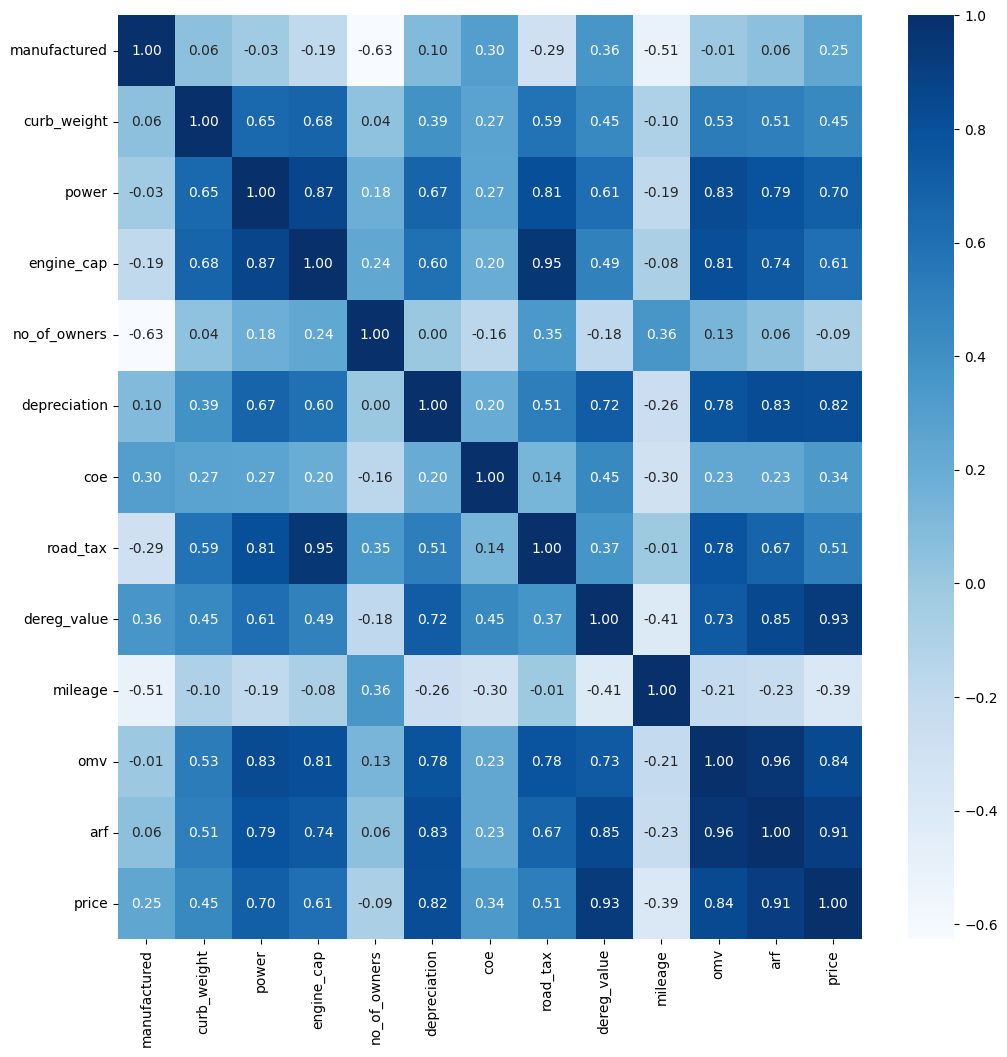

In [795]:
train_data.corr()
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(data=train_data.corr(),annot=True,cbar=True,fmt='.2f',cmap='Blues')

In [796]:
def zscore(train_data,column):
    train_data[column]=(train_data[column]-train_data[column].mean())/train_data[column].std()

In [797]:
def remove_out(train_data, column):
    low=train_data[column].quantile(0.2)
    high=train_data[column].quantile(0.8)
    IQR=high-low
    l=low-1.3*IQR
    h=high+1.3*IQR
    print(column,low,high,train_data[(train_data[column]>=l)
        &(train_data[column]<=h)]['price'].count()/train_data['price'].count())
    return train_data[(train_data[column]>=l) &(train_data[column]<=h)]

In [798]:
remain=1
cols=['price','omv','mileage','dereg_value','arf','depreciation'] #power
# cols=[]
for col in cols:
    train_data1=remove_out(train_data,col)
    remain*=train_data1['price'].count()/train_data.count()
    train_data=train_data1

print(remain)

price 45800.0 142800.0 0.9421814626879568
omv 18725.0 43121.600000000006 0.9472800039527645
mileage 58000.0 119999.8 0.9885770915919049
dereg_value 17524.4 51899.0 0.9578430855273572
arf 13544.0 42841.0 0.9807755866475708
depreciation 12980.0 19780.0 0.9728166245436675
manufactured    0.80634
curb_weight     0.80634
power           0.80634
engine_cap      0.80634
no_of_owners    0.80634
depreciation    0.80634
coe             0.80634
road_tax        0.80634
dereg_value     0.80634
mileage         0.80634
omv             0.80634
arf             0.80634
price           0.80634
dtype: float64


In [799]:
train_data.head()


,manufactured,curb_weight,power,engine_cap,no_of_owners,depreciation,coe,road_tax,dereg_value,mileage,omv,arf,price
1,2017.0,1465.0,135.0,1991.0,2.0,21170.0,47002,1202.0,45179.0,85680.0,40678.0,43950.0,96800.0
2,2007.0,1648.0,118.0,2354.0,3.0,12520.0,50355,2442.0,16003.0,138000.0,27994.0,30794.0,39800.0
3,2008.0,1195.0,80.0,1598.0,3.0,10140.0,27571,1113.0,12184.0,160000.0,16084.0,16084.0,44800.0
4,2006.0,1660.0,183.0,2995.0,6.0,13690.0,48479,3570.0,9138.0,183000.0,50414.0,55456.0,25800.0
8,2017.0,1465.0,135.0,1991.0,1.0,22520.0,49000,1202.0,49095.0,49930.0,41077.0,49508.0,102500.0


In [800]:
test_data.head()

,listing_id,manufactured,curb_weight,power,engine_cap,no_of_owners,depreciation,coe,road_tax,dereg_value,mileage,omv,arf,indicative_price
0,1303772,2015.0,1190.0,96.0,1496.0,2.0,17660.0,57199,682.0,9582.0,112000.0,19229.0,9229.0,NaN
1,1323166,2007.0,1235.0,79.0,1598.0,1.0,10920.0,42564,1113.0,13644.0,120000.0,14347.0,15782.0,NaN
2,1308405,2019.0,1535.0,141.0,1998.0,1.0,22120.0,32801,1210.0,54818.0,43000.0,39863.0,47809.0,NaN
3,1216706,2019.0,1100.0,79.0,1496.0,3.0,13700.0,29159,682.0,26363.0,53300.0,15573.0,15573.0,NaN
4,1298206,2015.0,1324.0,88.0,1496.0,3.0,14190.0,56001,682.0,15197.0,149000.0,18097.0,13097.0,NaN


In [801]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(columns = ['price']), train_data['price'], test_size=0.2, random_state=35)

X_train
X_test
y_train
y_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [802]:
def rmse_score(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [803]:
print("NaNs in X_train:", np.isnan(X_train).sum())

# Check for NaNs in X_test
print("NaNs in X_test:", np.isnan(X_test).sum())

NaNs in X_train: 0
NaNs in X_test: 0


In [804]:
model1 = Lasso(alpha= 0.7, max_iter = 10000, warm_start = True,  random_state = 50,selection = 'random')
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [805]:
model2 = BaggingRegressor(random_state=50, max_samples = 950)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [806]:
model3 = RandomForestRegressor(random_state=50,  max_features=0.43, min_samples_leaf=1,)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [807]:
# model4 = GradientBoostingRegressor(
#     random_state=50, 
#     min_samples_split = 6, 
#     min_samples_leaf =4, 
#     max_depth = 7
# )
model4 = GradientBoostingRegressor(
    random_state=50, 
    min_samples_split = 9, 
    min_samples_leaf =4, 
    max_depth = 7
)

model4.fit(X_train, y_train) 

y_pred4 = model4.predict(X_test)
print(rmse_score(y_test, y_pred4))

3761.713076540508


In [808]:
training_residuals = y_train - model3.predict(X_train)
model4.fit(X_train, training_residuals)
pred_residuals = model4.predict(X_test)
y_pred5 = pred_residuals + model3.predict(X_test)

In [809]:
model6 = tree.DecisionTreeRegressor()
model6.fit(X_train, y_train) 

y_pred6 = model6.predict(X_test)

In [810]:
model7= AdaBoostRegressor(random_state=0, n_estimators=100)
model7.fit(X_train, y_train) 
y_pred7 = model7.predict(X_test)

In [811]:
model8=BaggingRegressor(n_estimators=4, random_state=50, max_samples = 1600,max_features=6)
model8.fit(X_train, y_train) 
y_pred8 = model8.predict(X_test)


In [812]:
model9 = RandomForestRegressor(n_estimators=10,random_state=50,  max_features=0.75, min_samples_leaf=1,
                               min_impurity_decrease=0.22,)
model9.fit(X_train, y_train)
y_pred9 = model9.predict(X_test)



In [813]:
# model10 = RandomForestRegressor(n_estimators=10,random_state=50,  max_features=0.75, min_samples_leaf=1,
#                                min_impurity_decrease=0.22,criterion='absolute_error')
# model10.fit(X_train, y_train)
# y_pred10 = model10.predict(X_test)

training_residuals = y_train - model9.predict(X_train)
model4.fit(X_train, training_residuals)
pred_residuals = model4.predict(X_test)
y_pred10 = pred_residuals + model9.predict(X_test)

In [814]:
# model11 = GradientBoostingRegressor(
#     loss='huber',
#     random_state=50, 
#     min_samples_split = 6, 
#     min_samples_leaf =4, 
#     max_depth = 7,
#     criterion='squared_error',
# )
model11 = GradientBoostingRegressor(
    loss='huber',
    random_state=50, 
    min_samples_split = 6, 
    min_samples_leaf =4, 
    max_depth = 7,
    criterion='squared_error',
)
model11.fit(X_train, y_train) 

y_pred11 = model11.predict(X_test)
print(rmse_score(y_test, y_pred11))

3855.1767368801443


In [815]:
model12=VotingRegressor([('RF', model9), ('GB', model11)])
model12.fit(X_train, y_train) 

y_pred12 = model12.predict(X_test)

In [816]:
# categorical_features = [0]
# numerical_features = [1,2,3,4,5,6,7,8,9,10,11]
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),
#         ('cat', OneHotEncoder(), categorical_features)
#     ]
# )
# rf_model = RandomForestRegressor()

# rf_param_grid = {
#     'model__n_estimators': [100, 200, 300],
#     'model__max_features': ['auto', 'sqrt', 'log2'],
#     'model__max_depth': [None, 10, 20, 30],
#     'model__min_samples_split': [2, 5, 10],
#     'model__min_samples_leaf': [1, 2, 4],
#     'model__min_impurity_decrease':[0.1, 0.2, 0.3]
# }
# rf_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', rf_model)
# ])
# print(type(X_train))
# rf_search = RandomizedSearchCV(rf_pipeline, rf_param_grid, n_iter=10, cv=3, verbose=1, random_state=50)
# rf_search.fit(X_train, y_train)
# print(f'Best parameters for Random Forest: {rf_search.best_params_}')

In [817]:
model13 = RandomForestRegressor(n_estimators=300,random_state=50,  min_samples_split=10,max_features='sqrt', 
                               min_samples_leaf=2,
                               max_depth=20,
                               min_impurity_decrease=0.2,)
model13.fit(X_train, y_train)
y_pred13 = model13.predict(X_test)
print(rmse_score(y_test, y_pred13))

5515.872700421446


In [818]:
y_pred = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5,y_pred6,y_pred7,y_pred8,y_pred9,y_pred10,y_pred11,y_pred12,y_pred13]

In [819]:
mean_price = y_train.mean()
baseline_predictions = [mean_price] * len(y_test)
baseline_rmse = sqrt(mean_squared_error(y_test, baseline_predictions))

print(f"Baseline RMSE (Predicting Mean): {baseline_rmse:.2f}")

method = 1
for test in y_pred:
    r2_test = r2_score(y_test, test)
    rmse = rmse_score(y_test, test)
    print(f"R-squared (Test): {r2_test}")
    print(f"RMSE{method}: {rmse}\n")
    method+=1 

Baseline RMSE (Predicting Mean): 40347.57
R-squared (Test): 0.9173207056370913
RMSE1: 11601.509155332815

R-squared (Test): 0.9684511189075524
RMSE2: 7166.5162009262585

R-squared (Test): 0.9880825471704932
RMSE3: 4404.61371936332

R-squared (Test): 0.9913076116540818
RMSE4: 3761.713076540508

R-squared (Test): 0.9906652640738659
RMSE5: 3898.2269951794906

R-squared (Test): 0.9752224300693666
RMSE6: 6351.048973612443

R-squared (Test): 0.8362492920659073
RMSE7: 16327.049126008502

R-squared (Test): 0.9391140830232382
RMSE8: 9955.762596576977

R-squared (Test): 0.9880536169691374
RMSE9: 4409.956686686306

R-squared (Test): 0.9899851617526302
RMSE10: 4037.7374505962057

R-squared (Test): 0.9908703028249081
RMSE11: 3855.1767368801443

R-squared (Test): 0.9910446518693933
RMSE12: 3818.1883045484587

R-squared (Test): 0.9813105613811325
RMSE13: 5515.872700421446



In [820]:
# test_data.drop(columns=['listing_id', 'indicative_price'], inplace=True)
# # Fill missing values in numerical columns
# test_data['curb_weight'].fillna(test_data['curb_weight'].mean(), inplace=True)

# test_data['power'].fillna(test_data['power'].median(), inplace=True)

# test_data['no_of_owners'].fillna(test_data['no_of_owners'].mode()[0], inplace=True)

# test_data['mileage'].fillna(test_data['mileage'].median(), inplace=True)

# test_data.dropna(subset=['manufactured','engine_cap','depreciation','coe','road_tax','dereg_value','omv','arf'], inplace=True)
# test_data.isna().sum()

In [821]:
# Drop 'indicative_price' since it's all missing
test_data.drop(columns=['listing_id', 'indicative_price'], inplace=True)

# Fill missing values in numerical columns
test_data['manufactured'].fillna(test_data['manufactured'].median(), inplace=True)
test_data['curb_weight'].fillna(test_data['curb_weight'].mean(), inplace=True)

test_data['power'].fillna(test_data['power'].median(), inplace=True)

test_data['engine_cap'].fillna(test_data['engine_cap'].mean(), inplace=True)
test_data['no_of_owners'].fillna(test_data['no_of_owners'].mode()[0], inplace=True)
test_data['depreciation'].fillna(test_data['depreciation'].median(), inplace=True)

test_data['coe'].fillna(test_data['coe'].median(), inplace=True)
test_data['road_tax'].fillna(test_data['road_tax'].median(), inplace=True)
test_data['dereg_value'].fillna(test_data['dereg_value'].median(), inplace=True)

test_data['mileage'].fillna(test_data['mileage'].median(), inplace=True)

test_data['omv'].fillna(test_data['omv'].median(), inplace=True)

test_data['arf'].fillna(test_data['arf'].median(), inplace=True)



test_data.isna().sum()

C:\Users\echo\AppData\Local\Temp\ipykernel_16836\1864378945.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['manufactured'].fillna(test_data['manufactured'].median(), inplace=True)
C:\Users\echo\AppData\Local\Temp\ipykernel_16836\1864378945.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

manufactured    0
curb_weight     0
power           0
engine_cap      0
no_of_owners    0
depreciation    0
coe             0
road_tax        0
dereg_value     0
mileage         0
omv             0
arf             0
dtype: int64

In [822]:
model4 = GradientBoostingRegressor(
    random_state=50, 
    min_samples_split = 6, 
    min_samples_leaf =4, 
    max_depth = 7
)

model4.fit(X_train, y_train) 

GradientBoostingRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=6,
                          random_state=50)

In [823]:
reg_lasso=Lasso()
reg_lasso.fit(X_train,y_train)
y_pred33 = reg_lasso.predict(X_test)
r2_test = r2_score(y_test, y_pred33)
rmse = rmse_score(y_test, y_pred33)
print(f"R-squared (Test): {r2_test}")
print(f"RMSE{method}: {rmse}\n")

R-squared (Test): 0.9173198346576308
RMSE14: 11601.570262830475



In [824]:

test_data.head()
print(train_data.info())
print(test_data.info())
print(test_data.shape)
print(X_test.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 17321 entries, 1 to 24999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufactured  17321 non-null  float64
 1   curb_weight   17321 non-null  float64
 2   power         17321 non-null  float64
 3   engine_cap    17321 non-null  float64
 4   no_of_owners  17321 non-null  float64
 5   depreciation  17321 non-null  float64
 6   coe           17321 non-null  int64  
 7   road_tax      17321 non-null  float64
 8   dereg_value   17321 non-null  float64
 9   mileage       17321 non-null  float64
 10  omv           17321 non-null  float64
 11  arf           17321 non-null  float64
 12  price         17321 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 

In [825]:
scaler = StandardScaler()
test_data_y = scaler.fit_transform(test_data)
y_pred_y = model4.predict(test_data_y)
result_df = pd.DataFrame({
    'Id': test_data.index,
    'Predicted': y_pred_y
})

result_df.to_csv('predicted_results.csv', index=False)